In [1]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.N = 0
        self.mean = 0
        
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1/self.N)*self.mean + 1/self.N*x

In [21]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    
    for i in range(N):
        p = np.random.random()
        if eps < 0.5:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        data[i] = x
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average    

In [22]:
data = [1,2,3,4,5]
n = np.cumsum(data)
d = (np.arange(5) + 1)
print(n)
print(d)
print(n/d)

[ 1  3  6 10 15]
[1 2 3 4 5]
[1.  1.5 2.  2.5 3. ]


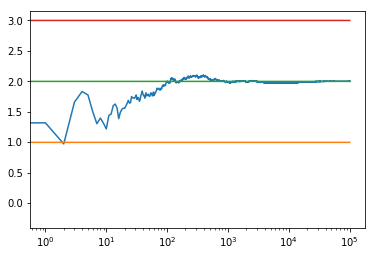

1.0044601839855036
1.9955258143068066
3.0020305584752562


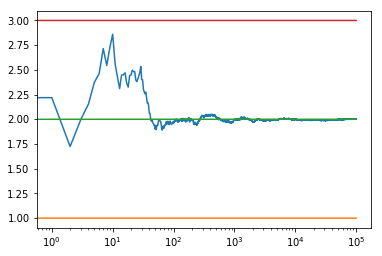

1.007968034607675
2.0002261625644047
2.9995045496489348


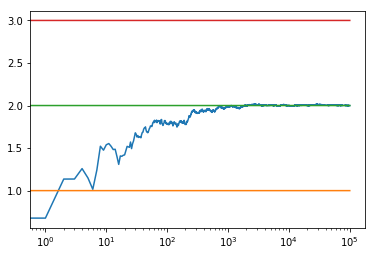

0.9941565284322476
2.0024138385064223
3.0022837215377542


In [23]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

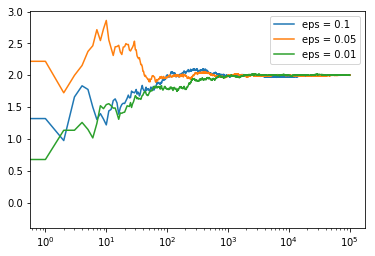

In [24]:
# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

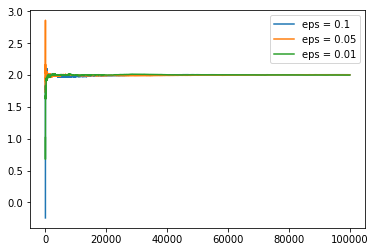

In [25]:
# linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()

In [26]:
np.random.randn()

0.014461022326876363